# Task-1: Happy Customers 

* Recep Oğuzhan Çetin

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df = pd.read_csv("ACME-HappinessSurvey2020.csv")
df.shape, df.head()

((126, 7),
    Y  X1  X2  X3  X4  X5  X6
 0  0   3   3   3   4   2   4
 1  0   3   2   3   5   4   3
 2  1   5   3   3   3   3   5
 3  0   5   4   3   3   3   5
 4  0   5   4   3   3   3   5)

In [2]:
df.info() # we do not need data cleaning or data imputation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [3]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


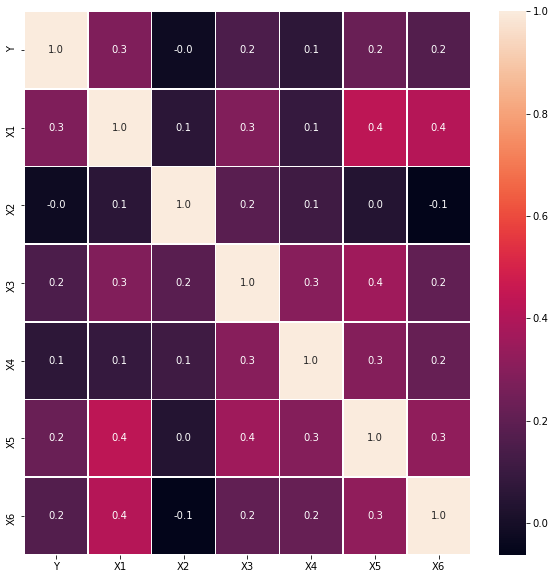

In [4]:
import seaborn as sns
f,ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt= '.1f', ax=ax)
plt.show()

In [5]:
# Let's obtain X and y 
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler, MinMaxScaler

y = df["Y"]
X = df.iloc[:,1:7]

print("X size :", X.shape)
print("Y size: ", y.shape)


# scaler = StandardScaler()
# X_scaled = pd.DataFrame(scaler.fit_transform(X))

X size : (126, 6)
Y size:  (126,)


In [6]:
# Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC, LinearSVC

model = SVC(kernel="linear")
cv = RFECV(model)
cv.fit(X,y)
print("Support: ", cv.support_)
print("Ranks: ", cv.ranking_)

Support:  [ True  True False False  True False]
Ranks:  [1 1 4 3 1 2]


In [7]:
# extracting train test dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, train_size = 0.7)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score of our model is:",accuracy)

Accuracy score of our model is: 0.5789473684210527


In [8]:
# Now lets choose our features as we find in the feature selection step

X_new = pd.DataFrame()
for i in range (0, X.shape[1]):
    if(cv.support_[i] == True):
        X_new["X"+str(i+1)] = X.iloc[:, i]
X_new.head()

,X1,X2,X5
0,3,3,2
1,3,2,4
2,5,3,3
3,5,4,3
4,5,4,3


* Recursive Feature Elimination and Cross-Validation Selection says that you can eliminate features x3, x4 and x6

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=12, train_size = 0.7)

# Training the model with new X data

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score of model is:",accuracy)

Accuracy score of model is: 0.631578947368421


Best score for following random state variable 10 is 0.7368421052631579


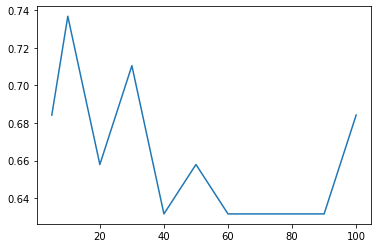

In [10]:
# Let's try hyperparameter tuning

scores = []
best_score = 0

random_states = [5, 10, 20, 30, 40, 50, 60, 80, 90, 100]
for randomState in random_states:
    model = RandomForestClassifier(random_state = randomState)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    if accuracy > best_score:
        best_score = accuracy
        random_state_variable = randomState
        
print("Best score for following random state variable",random_state_variable,"is",best_score)
plt.plot(random_states, scores)
plt.show()

* We got accuracy score as 0.73684

Best score for following leaf size 1 is 0.7368421052631579


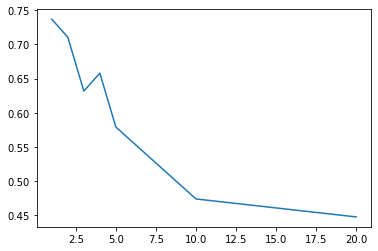

In [11]:
# May be we can find better accuracy score with more parameter tuning

best_score = 0
scores = []
leaf_options = [1,2,3,4,5,10,20]

for leaf_size in leaf_options :
    model = RandomForestClassifier(random_state =random_state_variable, min_samples_leaf = leaf_size)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    if accuracy > best_score:
        best_score = accuracy
        leaf = leaf_size
        
print("Best score for following leaf size",leaf,"is",best_score)
plt.plot(leaf_options, scores)
plt.show()

Best score for following estimators 10 is 0.7368421052631579


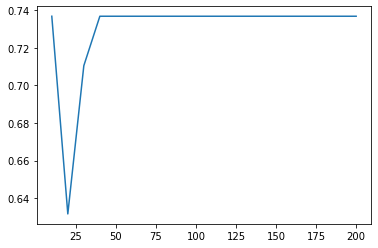

In [12]:
best_score = 0
scores = []
estimators = [10,20,30,40,50,100,200]

for n_estimator in estimators :
    model = RandomForestClassifier(random_state =random_state_variable, min_samples_leaf = leaf, n_estimators=n_estimator)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    if accuracy > best_score:
        best_score = accuracy
        estimator = n_estimator
        
print("Best score for following estimators",estimator,"is",best_score)
plt.plot(estimators, scores)
plt.show()

Best score for following depth 7.0 is 0.7368421052631579


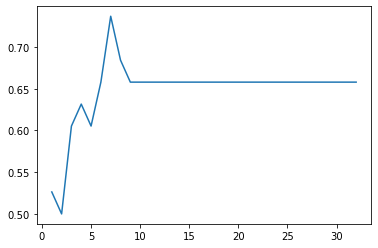

In [13]:
max_depths = np.linspace(1, 32,32, endpoint=True)
scores = []
best_score = 0

for depth in max_depths:
    model = RandomForestClassifier(random_state=randomState, min_samples_leaf = leaf,
                                  n_estimators=estimator, max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    if accuracy > best_score:
        best_score = accuracy
        ideal_depth = depth
        
print("Best score for following depth",ideal_depth,"is",best_score)
plt.plot(max_depths, scores)
plt.show()

Best score for following features auto is 0.7368421052631579


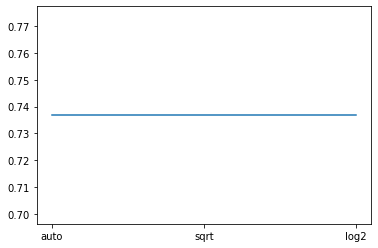

In [14]:
max_features = ["auto","sqrt","log2"]
scores = []
best_score = 0

for features in max_features:
    model = RandomForestClassifier(random_state =randomState, min_samples_leaf = leaf,
                                   n_estimators=estimator, max_depth=ideal_depth, max_features=features)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    if accuracy > best_score:
        best_score = accuracy
        max_feature = features
        
print("Best score for following features",max_feature,"is",best_score)
plt.plot(max_features, scores)
plt.show()

* Other parameters can also be tried but for now we get same scores
* I wanted to show the hyperparameter tuning with that way instead of grid search parameters